In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re


In [20]:
def load_dataset():
    data = pd.read_csv('textblob_dataset.csv')
    return data

In [21]:
tweet_df = load_dataset()
df = pd.DataFrame(tweet_df)
df

,Unnamed: 0,timestamp,tweet,sentiment
0,0,2022-05-15 06:12:25+00:00,i-i haven t had the booster vaccine yet,Negative
1,1,2022-05-19 09:35:16+00:00,aa already has the booster vaccine you can t s...,Negative
2,2,2022-05-19 10:00:50+00:00,amen allahumma amen for the prayers for the fa...,Positive
3,3,2022-03-03 06:31:44+00:00,amen tomorrow is a booster vaccine even though,Negative
4,4,2022-03-03 09:22:40+00:00,amen go home take a break immediately sis when...,Negative
...,...,...,...,...
4055,4055,2022-05-14 09:51:38+00:00,let s get vaccine booster ampoule url,Negative
4056,4056,2022-03-03 03:00:35+00:00,let s vaccine booster url,Negative
4057,4057,2021-11-25 06:57:09+00:00,yes yes yes yes kookmin jikook short au people...,Positive
4058,4058,2022-03-03 06:57:02+00:00,yes you are free to choose any booster vaccine...,Positive


In [22]:
def label(x):
    if ( x == 'Positive'):
        return 1
    else:
        return 0
df.sentiment = df.sentiment.apply(label)

In [23]:
df

,Unnamed: 0,timestamp,tweet,sentiment
0,0,2022-05-15 06:12:25+00:00,i-i haven t had the booster vaccine yet,0
1,1,2022-05-19 09:35:16+00:00,aa already has the booster vaccine you can t s...,0
2,2,2022-05-19 10:00:50+00:00,amen allahumma amen for the prayers for the fa...,1
3,3,2022-03-03 06:31:44+00:00,amen tomorrow is a booster vaccine even though,0
4,4,2022-03-03 09:22:40+00:00,amen go home take a break immediately sis when...,0
...,...,...,...,...
4055,4055,2022-05-14 09:51:38+00:00,let s get vaccine booster ampoule url,0
4056,4056,2022-03-03 03:00:35+00:00,let s vaccine booster url,0
4057,4057,2021-11-25 06:57:09+00:00,yes yes yes yes kookmin jikook short au people...,1
4058,4058,2022-03-03 06:57:02+00:00,yes you are free to choose any booster vaccine...,1


In [24]:
def wc1(data,bgcolor, title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, colormap = "Reds", max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [25]:
top_N = 50
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

# # sent = df[df['label']==1]
# 

df['tweet'] = df['tweet'].str.replace('url', '')

neg_tweets =df[df.sentiment == 0]

a = neg_tweets.tweet.str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en', 'id'))         
nltk_words = list(stopwords.words('english', 'indonesian'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_tweet = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_tweet)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

In [26]:
rslt

,Word,Frequency
0,vaccine,1522
1,booster,1187
2,covid,298
3,vaccines,258
4,dose,205
5,really,173
6,safe,168
7,good,162
8,vaccination,145
9,healthy,142


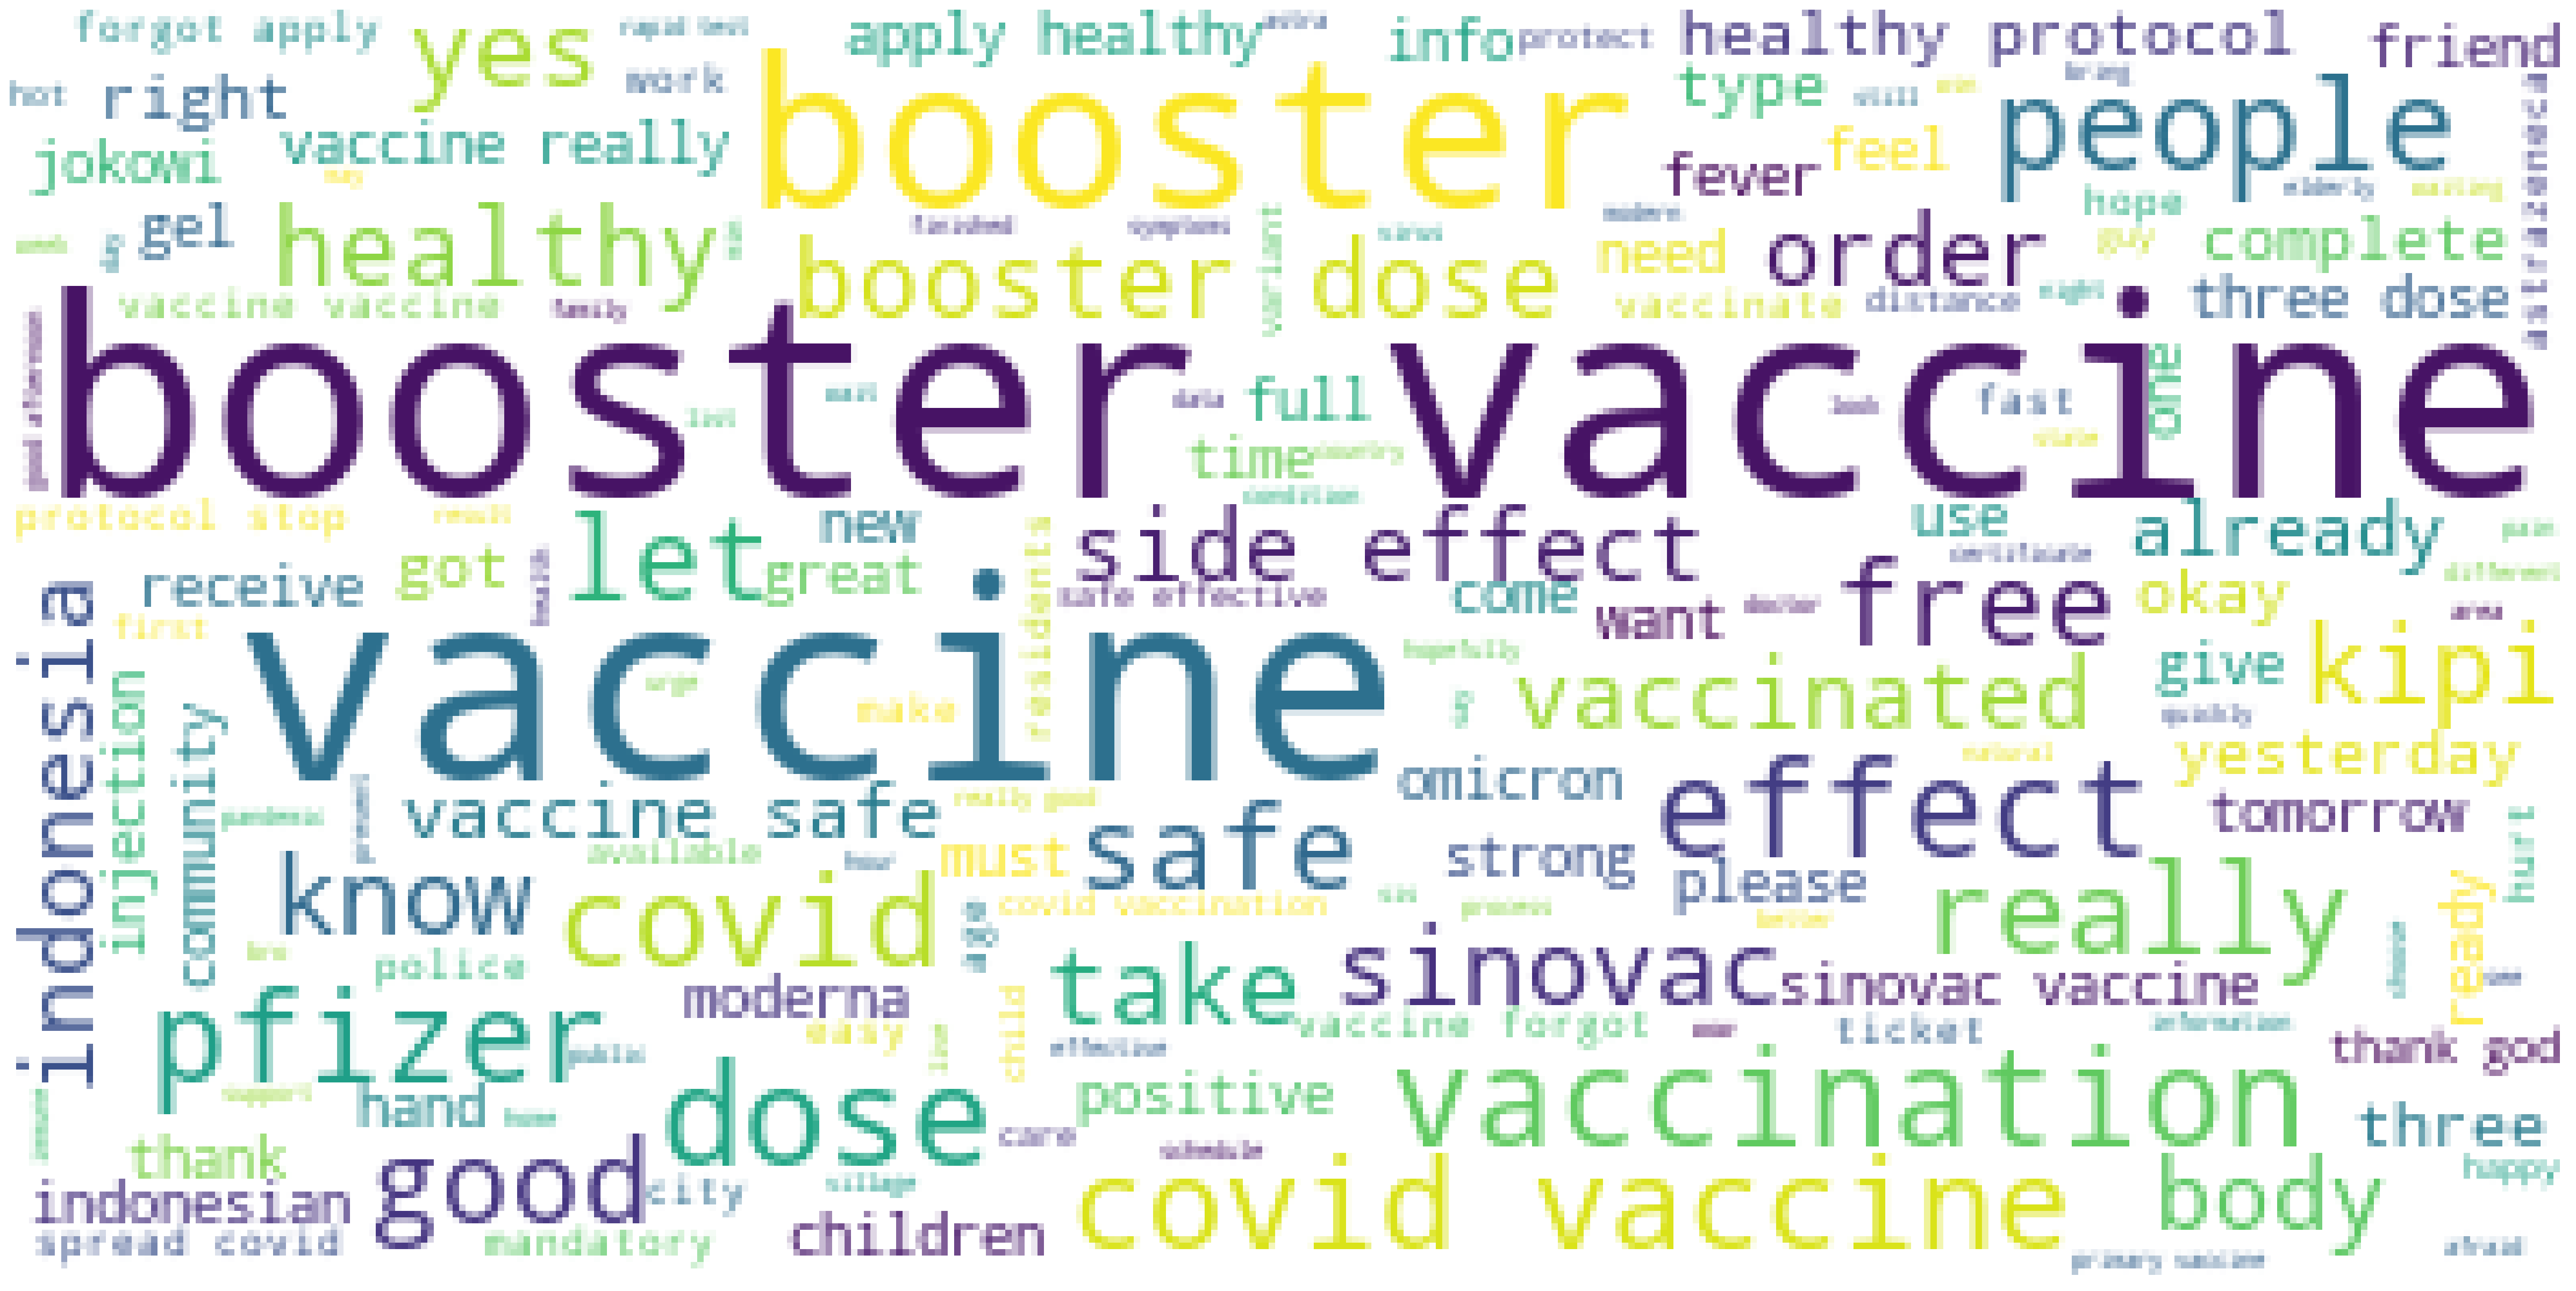

In [27]:
wc1(cleaned_tweet, 'White', 'Common Words' )